# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gzip
import shutil
import os
import re

import acquire_nick as an
import prepare_nick as pn
import wrangle as w

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = w.wrangle_df()
df.head()

clean.csv not detected.
Acquiring and Preparing Data
Capstone CSV not detected.
reading dirty CSVs: credits and movies_metadata


/Users/braedenwright/codeup-data-science/capstone-project/wrangle.py:15: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df = prep_data(acquire_data())


clean.csv not detected.
processing capstone.csv
clean.csv ready for future use


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,False,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,False,1995-12-09,1995,tt0113101,False,False,False,False,False,False,True,True,False,False,False,False,False
6,Judgment Night,False,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,False,1993-10-15,1993,tt0107286,False,False,False,False,False,True,True,False,False,True,False,False,False
11,Star Wars,True,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,True,1977-05-25,1977,tt0076759,True,False,False,True,False,False,False,False,False,True,False,False,False
12,Finding Nemo,True,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,True,2003-05-30,2003,tt0266543,False,False,False,False,False,False,False,False,True,False,False,False,False
13,Forrest Gump,True,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,True,1994-07-06,1994,tt0109830,False,False,True,False,True,False,False,True,False,False,False,False,False


In [3]:
df.shape

(7282, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282 entries, 5 to 443319
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 7282 non-null   object        
 1   success               7282 non-null   bool          
 2   success_rating        7282 non-null   float64       
 3   genres                7282 non-null   object        
 4   cast_actor_1          7282 non-null   object        
 5   cast_actor_2          7282 non-null   object        
 6   cast_actor_3          7282 non-null   object        
 7   total_n_cast          7282 non-null   float64       
 8   budget                7282 non-null   float64       
 9   revenue               7282 non-null   float64       
 10  profit_amount         7282 non-null   float64       
 11  vote_average          7282 non-null   float64       
 12  vote_count            7282 non-null   float64       
 13  production_compa

In [5]:
df.describe()

,success_rating,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,popularity,runtime,release_year
count,7282.000000,7282.000000,7.282000e+03,7.282000e+03,7.282000e+03,7282.00000,7282.000000,7282.000000,7282.000000,7282.000000
mean,9.566970,21.654491,2.551717e+07,6.987853e+07,4.436136e+07,6.23245,568.187449,8.621582,108.024718,1999.556441
std,21.569372,18.870119,3.570461e+07,1.474352e+08,1.231651e+08,0.98227,1113.367568,12.228099,21.065622,15.502220
min,0.000000,3.000000,1.020000e+06,1.000000e+00,-1.657101e+08,0.00000,0.000000,0.000001,0.000000,1915.000000
25%,0.875969,11.000000,8.000000e+06,2.612360e+06,-6.843298e+06,5.70000,44.000000,4.140868,94.000000,1992.000000
50%,4.133958,16.000000,8.000000e+06,1.733998e+07,4.000000e+06,6.30000,165.000000,7.506915,104.000000,2004.000000
75%,10.483487,25.000000,3.000000e+07,6.869919e+07,4.084713e+07,6.90000,551.750000,10.977723,118.000000,2011.000000
max,667.333333,313.000000,3.800000e+08,2.787965e+09,2.550965e+09,10.00000,14075.000000,547.488298,338.000000,2017.000000


In [6]:
df['success_rating'] = (df['revenue']/(df['budget'] * 2)) * df['vote_average']

In [7]:
df.head(5)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,False,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,False,1995-12-09,1995,tt0113101,False,False,False,False,False,False,True,True,False,False,False,False,False
6,Judgment Night,False,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,False,1993-10-15,1993,tt0107286,False,False,False,False,False,True,True,False,False,True,False,False,False
11,Star Wars,True,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,True,1977-05-25,1977,tt0076759,True,False,False,True,False,False,False,False,False,True,False,False,False
12,Finding Nemo,True,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,True,2003-05-30,2003,tt0266543,False,False,False,False,False,False,False,False,True,False,False,False,False
13,Forrest Gump,True,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,True,1994-07-06,1994,tt0109830,False,False,True,False,True,False,False,True,False,False,False,False,False


In [8]:
# df.success_rating.describe(percentiles=.1)

In [9]:
df['success'] = df['success_rating'] > 6.5

In [10]:
df.sample(10)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10466,The Money Pit,True,1.704989e+01,Comedy Romance,Tom Hanks,Shelley Long,Alexander Godunov,22.0,10000000.0,54999651.0,44999651.0,6.2,288.0,UniversalPictures AmblinEntertainment,UnitedStatesofAmerica,After being evicted from their Manhattan apart...,7.054864,91.0,True,1986-03-15,1986,tt0091541,False,False,False,False,True,False,False,True,False,False,False,False,False
245855,Difret,False,1.676261e-02,Drama,Meron Getnet,Tizita Hagere,Haregewine Assefa,5.0,8000000.0,49667.0,-7950333.0,5.4,17.0,HaileAddisPictures,Ethiopia,"Three hours outside of Addis Ababa, a bright 1...",2.165608,96.0,False,2014-01-19,2014,tt2611390,False,False,True,False,False,False,False,False,False,False,False,False,False
996,Double Indemnity,False,1.250000e+00,Drama Mystery Thriller,Fred MacMurray,Barbara Stanwyck,Edward G. Robinson,30.0,8000000.0,2500000.0,-5500000.0,8.0,425.0,ParamountPictures,UnitedStatesofAmerica,Unsuspecting Mr. Dietrichson becomes increasin...,6.494320,107.0,False,1944-04-24,1944,tt0036775,False,False,True,False,False,True,False,False,False,False,True,False,False
16148,Zero Effect,False,1.188203e+00,Comedy Crime Mystery Thriller,Bill Pullman,Ben Stiller,Ryan O'Neal,15.0,5000000.0,1980338.0,-3019662.0,6.0,56.0,CastleRockEntertainment ColumbiaPicturesCorpor...,UnitedStatesofAmerica,Daryl Zero is a private investigator. Along wi...,3.621052,116.0,False,1998-01-30,1998,tt0120906,False,False,False,False,False,True,True,True,False,False,True,False,False
8337,They Live,True,1.154542e+01,Action Horror Science Fiction Thriller,Roddy Piper,Keith David,Meg Foster,47.0,4000000.0,13008928.0,9008928.0,7.1,562.0,UniversalPictures AliveFilms LarryFrancoProduc...,UnitedStatesofAmerica,"Nada, a down-on-his-luck construction worker, ...",11.292364,94.0,True,1988-11-23,1988,tt0096256,False,True,False,True,False,True,False,False,False,True,False,False,False
13365,49 Up,False,1.026690e-01,Documentary,Bruce Balden,Jacqueline Bassett,Symon Basterfield,4.0,8000000.0,238073.0,-7761927.0,6.9,12.0,,UnitedKingdom,49 Up is the seventh film in a series of landm...,0.769595,180.0,False,2005-09-15,2005,tt0473434,False,False,False,False,False,False,False,False,False,False,False,False,True
25471,The King of Masks,False,4.875000e-07,Drama,Zhu Xu,Chow Yam-Ying,Chiu Liu-Kong,8.0,8000000.0,1.0,-7999999.0,7.8,12.0,ShawBrothers,China HongKong,Wang Bianlian is an aging street performer kno...,2.291724,91.0,False,1997-12-20,1997,tt0115669,False,False,True,False,False,False,False,False,False,False,False,False,False
11575,The Great Race,True,7.600000e+00,Adventure Comedy,Jack Lemmon,Tony Curtis,Natalie Wood,17.0,12000000.0,25333333.0,13333333.0,7.2,64.0,WarnerBros.,UnitedStatesofAmerica,"Professional daredevil and white-suited hero, ...",4.473327,160.0,True,1965-07-01,1965,tt0059243,True,False,False,False,False,False,False,True,False,False,False,False,False
72387,Safe,False,4.236350e+00,Action Crime Thriller,Jason Statham,Chris Sarandon,James Hong,15.0,30000000.0,40346186.0,10346186.0,6.3,808.0,LawrenceBenderProductions IMGlobal AutomatikEn...,UnitedStatesofAmerica,After a former elite agent rescues a 12-year-o...,8.234382,94.0,False,2012-04-16,2012,tt1656190,False,False,False,False,False,True,True,False,False,True,False,False,False


In [11]:
# One Hot Encode for Genres

# df['is_genre_adventure'] = df.genres.apply(lambda genre_list: 'Adventure' in genre_list)
# df['is_genre_horror'] = df.genres.apply(lambda genre_list: 'Horror' in genre_list)
# df['is_genre_drama'] = df.genres.apply(lambda genre_list: 'Drama' in genre_list)
# df['is_genre_scifi'] = df.genres.apply(lambda genre_list: 'Science' in genre_list)
# df['is_genre_romance'] = df.genres.apply(lambda genre_list: 'Romance' in genre_list)
# df['is_genre_thriller'] = df.genres.apply(lambda genre_list: 'Thriller' in genre_list)
# df['is_genre_crime'] = df.genres.apply(lambda genre_list: 'Crime' in genre_list)
# df['is_genre_comedy'] = df.genres.apply(lambda genre_list: 'Comedy' in genre_list)
# df['is_genre_animation'] = df.genres.apply(lambda genre_list: 'Animation' in genre_list)
# df['is_genre_action'] = df.genres.apply(lambda genre_list: 'Action' in genre_list)
# df['is_genre_mystery'] = df.genres.apply(lambda genre_list: 'Mystery' in genre_list)
# df['is_genre_fantasy'] = df.genres.apply(lambda genre_list: 'Fantasy' in genre_list)
# df['is_genre_documentary'] = df.genres.apply(lambda genre_list: 'Documentary' in genre_list)

In [12]:
df.shape

(7282, 35)

<AxesSubplot:xlabel='id'>

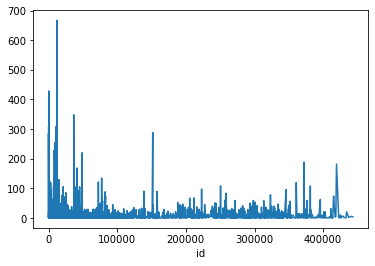

In [13]:
df.success_rating.plot()